In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv')

print(df.shape)
display(df.head())

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check the number of missing values in each column in the dataset
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### There is no missing value found in the dataset. 

In [4]:
# Divide the variables into numerical, categorical & target variable
nums = [
    'age',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate', 
    'cons.price.idx', 
    'cons.conf.idx',
    'euribor3m', 
    'nr.employed'
]

cats = [
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing', 
    'loan',
    'contact', 
    'month', 
    'day_of_week',
    'poutcome'
]

y = 'y'

In [5]:
df[nums].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### High standard deviation of 'pdays' is caused by value 999 is assigned to the clients was not contacted previously. We may change the value 999 to -1 instead to decrease the variance and standard deviation. 

##### The standard deviation of 'nr.employed' is also high. We may use natural log to reduce the variance.

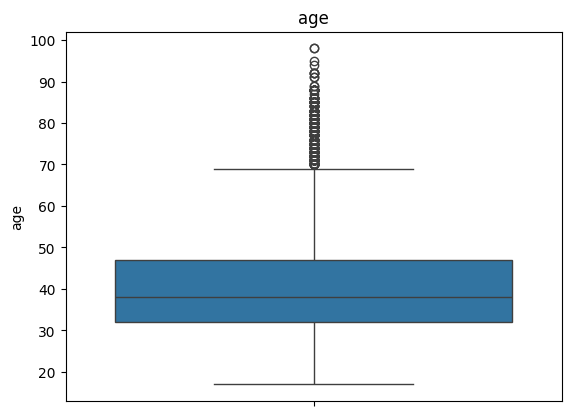

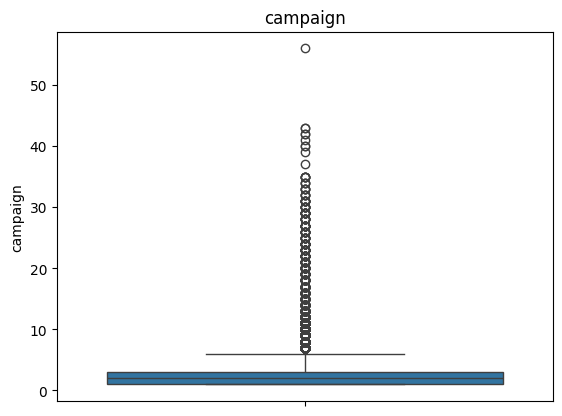

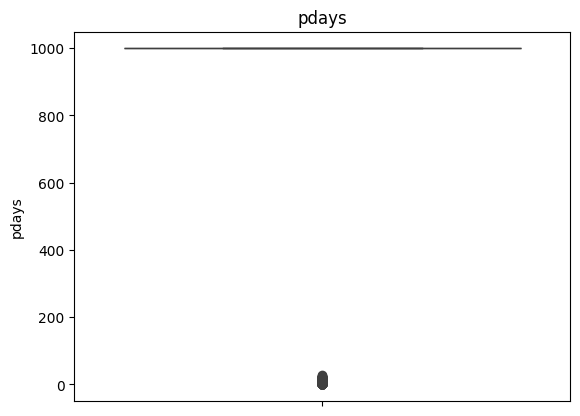

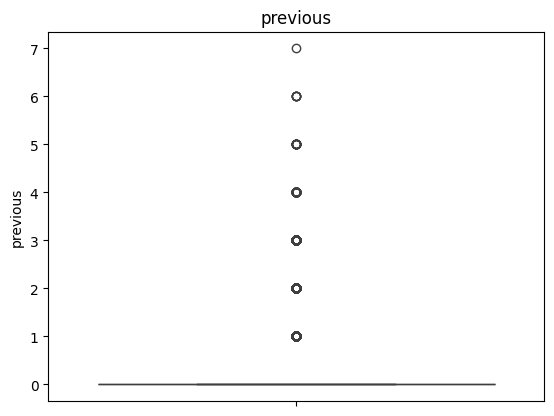

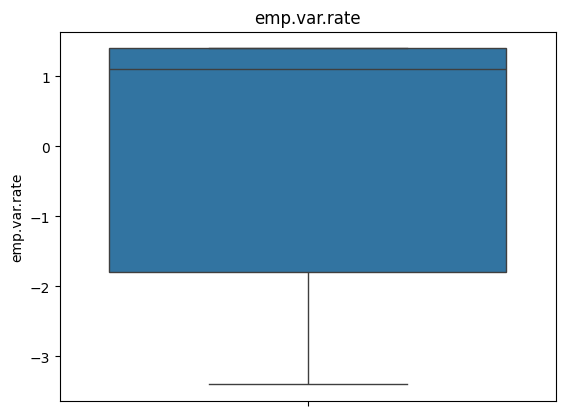

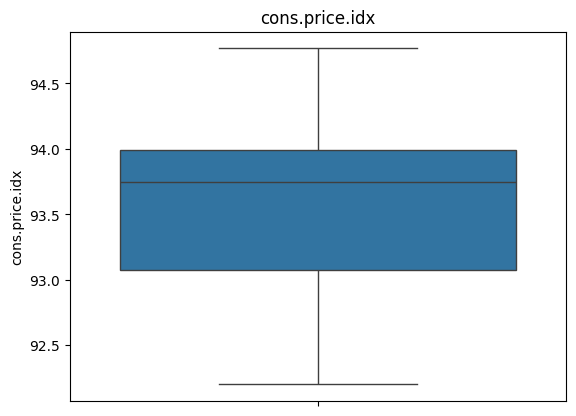

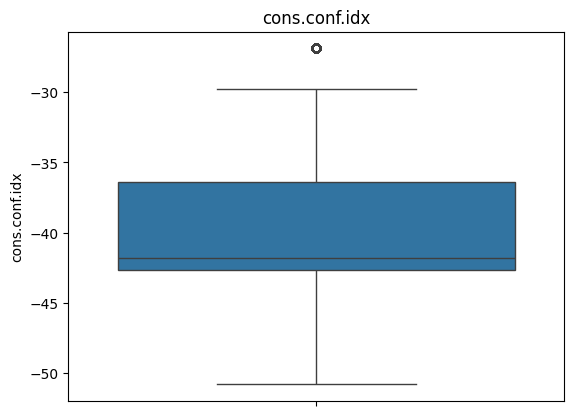

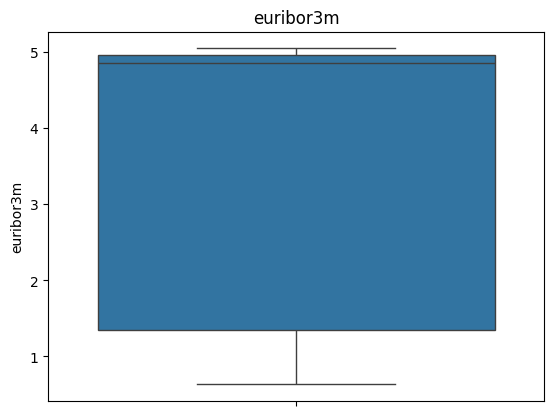

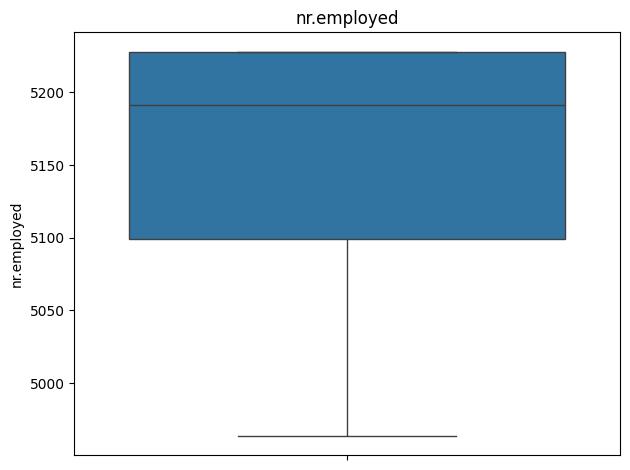

In [6]:
# Boxplot - numerical columns
for col in nums:
    plt.figure()  
    sns.boxplot(df[col]) 
    plt.title(col) 

plt.tight_layout() 
plt.show()

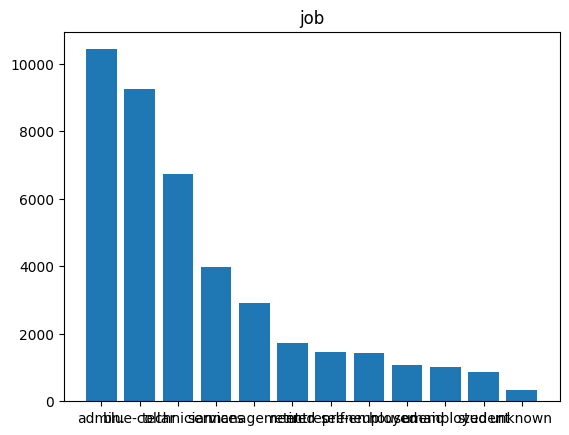

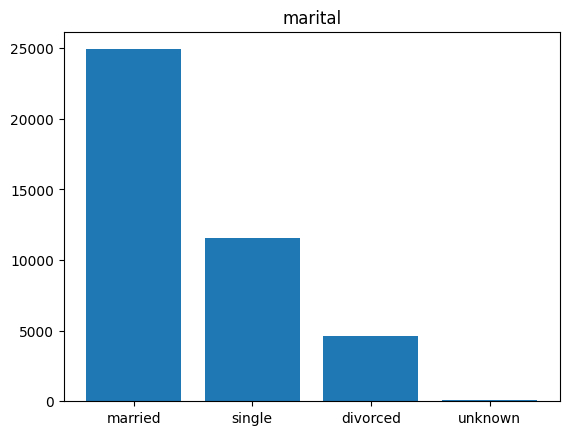

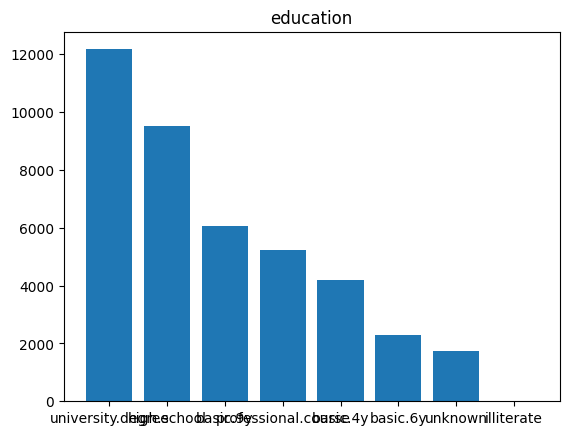

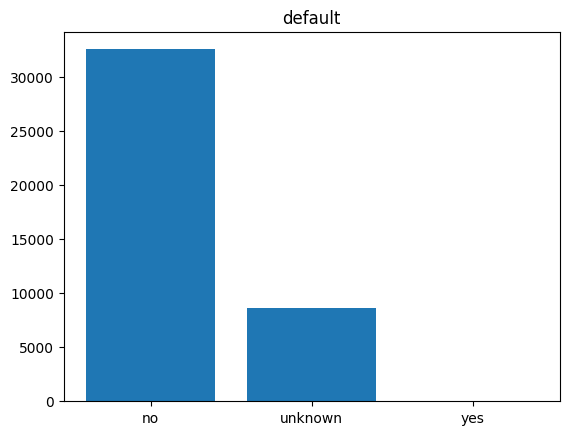

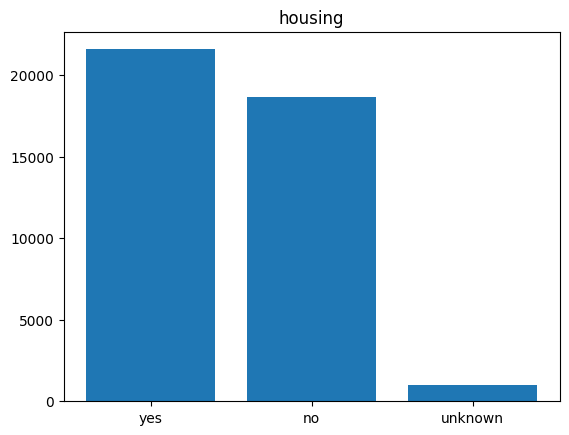

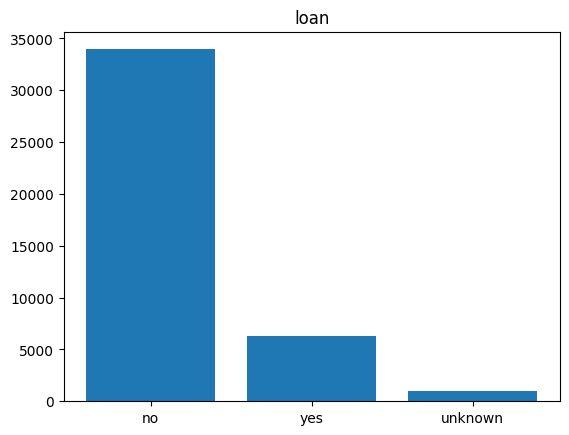

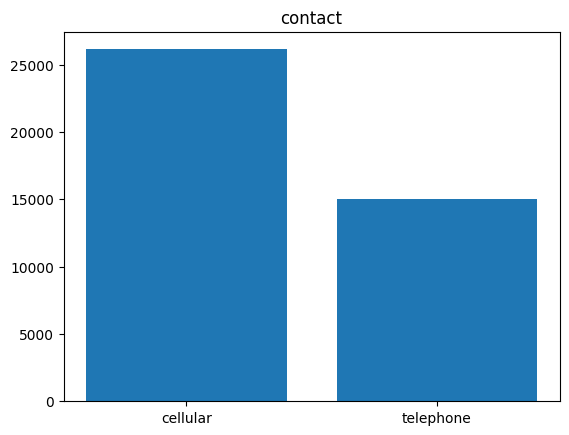

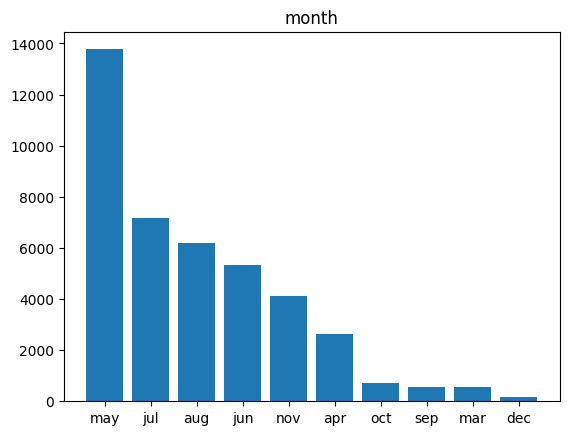

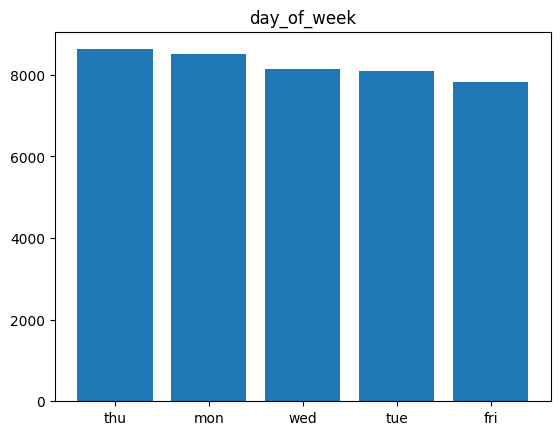

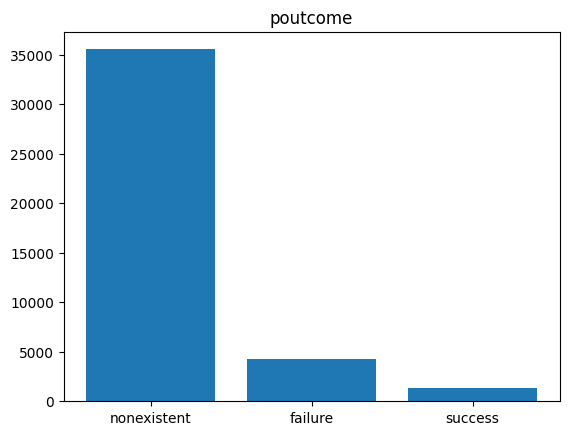

In [7]:
for col in cats:
    fig, ax = plt.subplots()
    ax.bar(df[col].value_counts().index, df[col].value_counts())
    ax.set_title(col) 

In [8]:
# Check the distribution of value in the target variable: y
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [9]:
# Check the proportions of the target variable
df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

##### There are only 4640 clients (11.2%) subscribe to the term deposit in the dataset. 
##### It indicates that the proportion of the target variable: y that we are interested to predict is extremely small.
##### This is an extremely imbalanced classification problem.

# Data Preprocessing

In [10]:
# Replace the value 999 in 'pdays' column to 1
df['pdays'] = df['pdays'].replace(999, -1)

In [11]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on categorical columns & target variable
df[cats] = df[cats].apply(LabelEncoder().fit_transform)
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
# Separate features and the target variable
df_x = df.drop(['y'], axis=1)
df_y = df[['y']]

##### Spearman correlation - understanding the non-linear relationships

In [14]:
df_corr = pd.concat([df_x, df_y], axis=1)

# Calculate correlations between variables
corr = df_corr.corr(method='spearman')

In [15]:
# Heatmap of the correlation values
import plotly.express as px

fig = px.imshow(corr, text_auto='.3f', color_continuous_scale='RdBu_r', color_continuous_midpoint=0, aspect='auto')
fig.show()

In [16]:
'''
1.
euribor3m - emp.var.rate 0.940
nr.employed - emp.var.rate 0.945
euribor3m - nr.employed 0.929

2. 
cons.price.idx - emp.var.rate 0.665
cons.price.idx - contact 0.660

3. 
month - emp.var.rate -0.399
month - euribor3m -0.47
month - nr.employed -0.364

4. 
previous - poutcome -0.497
previous - emp.var.rate -0.435
previous - euribor3m -0.455
previous - poutcome -0.439

'''

'\n1.\neuribor3m - emp.var.rate 0.940\nnr.employed - emp.var.rate 0.945\neuribor3m - nr.employed 0.929\n\n2. \ncons.price.idx - emp.var.rate 0.665\ncons.price.idx - contact 0.660\n\n3. \nmonth - emp.var.rate -0.399\nmonth - euribor3m -0.47\nmonth - nr.employed -0.364\n\n4. \nprevious - poutcome -0.497\nprevious - emp.var.rate -0.435\nprevious - euribor3m -0.455\nprevious - poutcome -0.439\n\n'

##### Mutual Information - understand how much a variable depends on the others, in order to gauge the predictive power of the variable vs target

In [17]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information for each feature versus the target variable
mi = mutual_info_classif(df_x, df_y, random_state=2308)

res = {}
for i, j in zip(df_x.columns, mi):
    res[i] = j
    
df_res = pd.DataFrame.from_dict(res, columns=['mutual_info'], orient='index')

df_res.sort_values(by='mutual_info', ascending=False)

c:\Users\Leong Pit Khien\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,mutual_info
euribor3m,0.073418
cons.conf.idx,0.069536
cons.price.idx,0.067751
nr.employed,0.064289
emp.var.rate,0.055804
pdays,0.039431
poutcome,0.038831
month,0.026878
previous,0.020961
contact,0.013974


##### Cramer's V - quantify the association between categoricals, where it is more appropriate than using correlation for categorical variables

In [18]:
from scipy import stats

def cramers_v(data):
    # Calculate the chi-squared test statistic
    X2 = stats.chi2_contingency(data, correction=False)[0]
    N = np.sum(data)
    k = min(data.shape)

    # Cramer's V formula
    V = np.sqrt((X2/N) / (k-1))

    return(V)

cramer_v_result = []

for col in cats:
    cont_table = pd.crosstab(df_x[col], df_y['y']).values
    res = cramers_v(cont_table)
    cramer_v_result.append(res)

res = {}
for i, j in zip(cats, cramer_v_result):
    res[i] = j
    
df_res = pd.DataFrame.from_dict(res, columns=['cramers_v'], orient='index')

df_res.sort_values(by='cramers_v', ascending=False)

,cramers_v
poutcome,0.320488
month,0.274395
job,0.152768
contact,0.144773
default,0.099354
education,0.068472
marital,0.054570
day_of_week,0.025195
housing,0.011748
loan,0.005154
